In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Set seaborn style and palette
sns.set_style('whitegrid')
sns.set_palette('pastel')

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\NILESH GOLATKAR\Churn_Modelling.csv")

# Display the first few rows of the dataframe
print(df.head())

# Display the column names
print(df.columns)


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

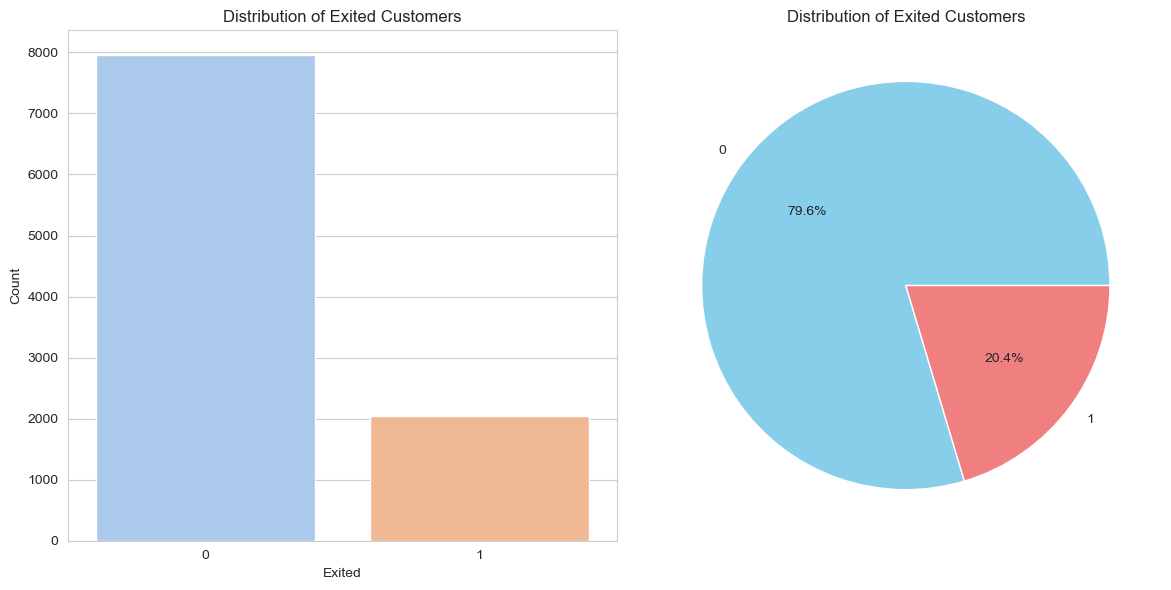

In [3]:
# Part 2: Exploratory Data Analysis (EDA)

# Explore target variable distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Exited', data=df)
plt.title('Distribution of Exited Customers')
plt.xlabel('Exited')
plt.ylabel('Count')

# Pie chart for distribution of exited customers
plt.subplot(1, 2, 2)
df['Exited'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Exited Customers')
plt.ylabel('')

plt.tight_layout()
plt.show()

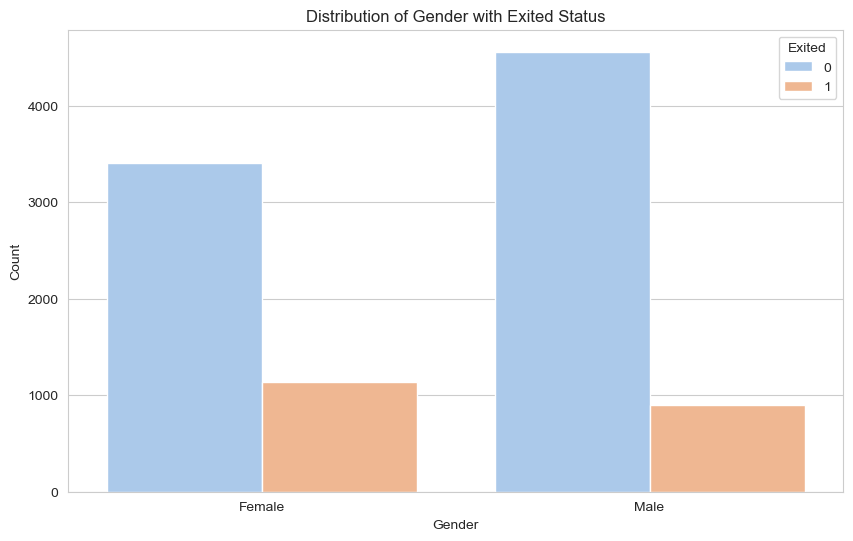

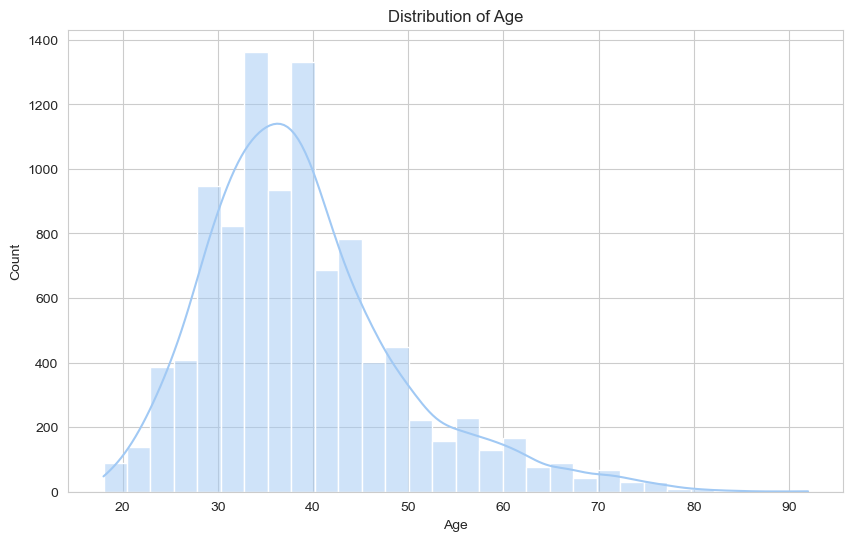

In [4]:
# Explore gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title('Distribution of Gender with Exited Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Explore distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [5]:
# Part 3: Data Preprocessing

# Drop specified columns
columns_to_drop = ['RowNumber', 'Surname', 'CustomerId']
df = df.drop(columns=columns_to_drop)

# Apply label encoding to 'Gender' column
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Apply one-hot encoding to 'Geography' column
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

# Display information about the dataframe after dropping columns and encoding
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int32  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_Germany  10000 non-null  bool   
 11  Geography_Spain    10000 non-null  bool   
dtypes: bool(2), float64(2), int32(1), int64(7)
memory usage: 761.8 KB
None


In [6]:
# Part 4: Splitting Data into Training and Testing Sets

# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Exited'])  # Assuming 'Exited' is your target variable
y = df['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Part 5: Model Training and Evaluation

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=0),
    "Logistic Regression": LogisticRegression(),
    "LinearSVC": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=60, random_state=0),
    "XGB": XGBClassifier(random_state=0),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Train and evaluate models
accuracy_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy
    print(f"Model: {name}\n{report}\nAccuracy: {accuracy:.2f}\n")

# Convert accuracy_scores dictionary to DataFrame for plotting
accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Algorithm', 'Accuracy'])

Model: Decision Tree
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.76      0.40      0.52       393

    accuracy                           0.86      2000
   macro avg       0.82      0.68      0.72      2000
weighted avg       0.85      0.86      0.84      2000

Accuracy: 0.86

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000

Accuracy: 0.80



C:\Users\NILESH GOLATKAR\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\NILESH GOLATKAR\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\NILESH GOLATKAR\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NILESH GOLATKAR\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

Model: LinearSVC
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000

Accuracy: 0.80

Model: Random Forest
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.77      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.86      2000

Accuracy: 0.87

Model: XGB
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.51      0.60       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76    

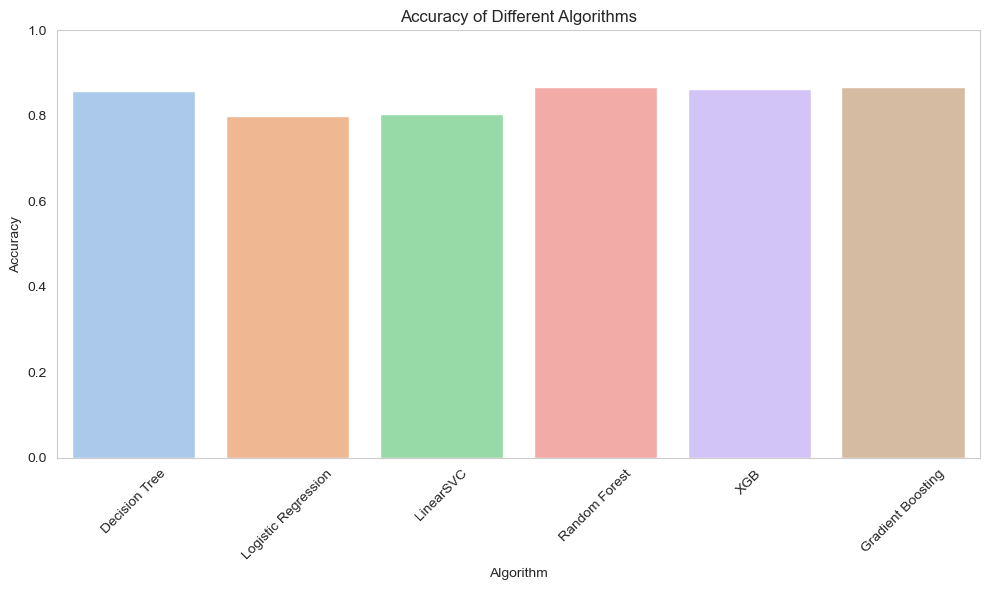

In [8]:

# Part 6: Visualizing Model Performance

# Plotting accuracy of different algorithms
plt.figure(figsize=(10, 6))
sns.barplot(x='Algorithm', y='Accuracy', data=accuracy_df, palette='pastel')
plt.title('Accuracy of Different Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()




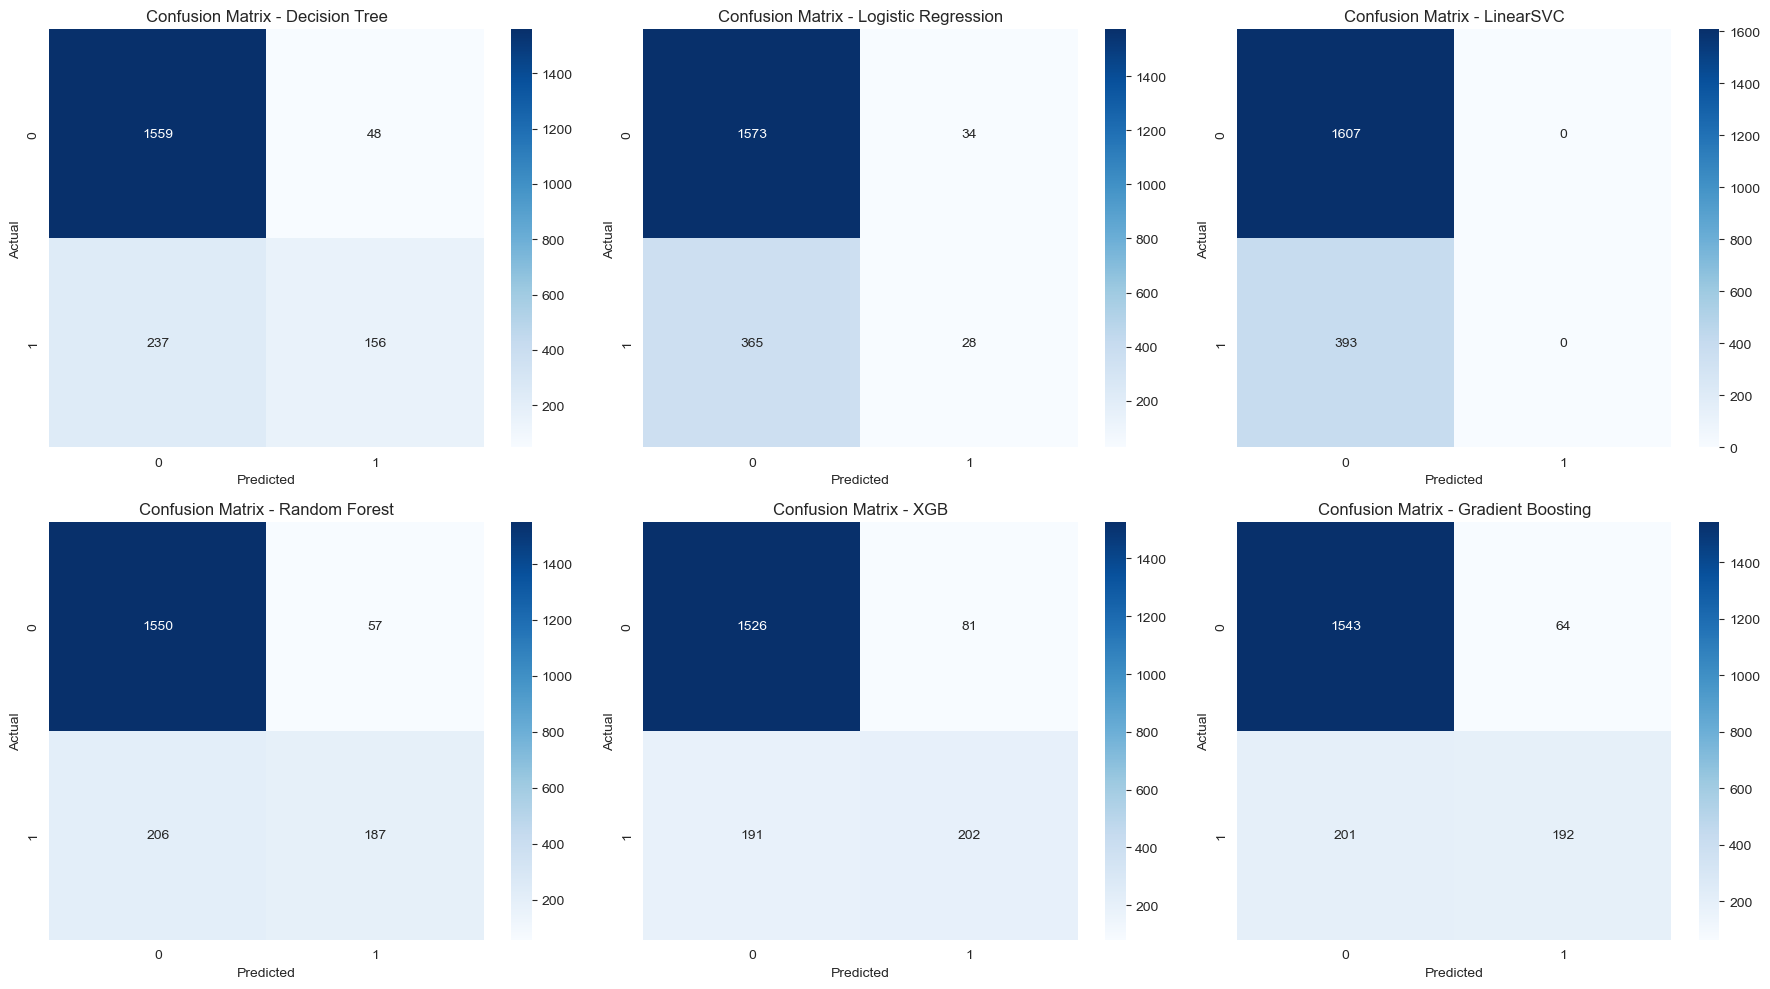

In [9]:
# Plotting confusion matrix heatmap for each algorithm
plt.figure(figsize=(18, 10))
for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(2, 3, i)
    sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()
